In [51]:
#import libraries
import pandas as pd

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from matplotlib.finance import candlestick_ohlc

from datetime import datetime

import numpy as np

In [52]:
def load_close(file_name,crypto_name, start_date):
    '''
    input : file_name with cryptocurrency prices and crypto name (BTC, ETH, LTC), and start date of data
    output:  dataframe with Date and daily close      
    '''
    #list of column names
    cols = ['Date',crypto_name + ' Close']
    data = pd.read_csv(file_name, usecols=['Date','Close'], parse_dates=['Date'])  
    data.columns = cols
    data_sorted = data.sort_values(by='Date')
    mask = (data_sorted['Date'] >= start_date)
    data_sorted_from_start_date = data_sorted[data_sorted.columns[:2]].loc[mask]

    return data_sorted_from_start_date

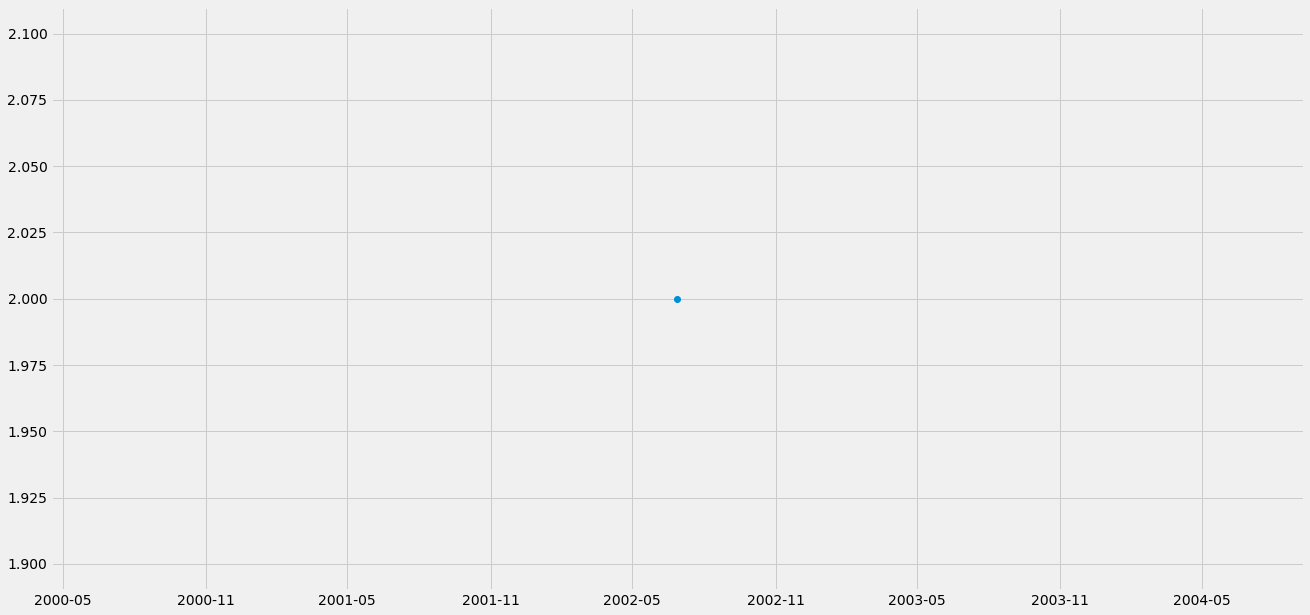

In [53]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
a=np.datetime64('2002-06-28').astype(datetime)
plt.plot_date(a,2)

In [55]:
df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date']) 
df['Date'] = np.datetime64(df['Date']).astype(datetime)
#df_btc_sorted = load_close('bitcoin_price.csv','BTC','2017-01-01')
#df.head()
#df.dtypes

#pd.to_datetime(df.Date)
plt.plot(df['Date'],df['Close'], color='orange', label='BTC', style='o')

ValueError: Could not convert object to NumPy datetime

In [56]:
#create data frames with closing prices for each crypto
df_btc_sorted = load_close('bitcoin_price.csv','BTC','2017-01-01')
df_eth_sorted = load_close('ethereum_price.csv','ETH','2017-01-01')
df_ltc_sorted = load_close('litecoin_price.csv','LTC','2017-01-01')

#join tables on date (first bitcoin and ethereum and then the first joined table to litecoin)
df_btc_eth = pd.merge(df_btc_sorted, df_eth_sorted, on='Date', how='outer')
df_btc_eth_ltc = pd.merge(df_btc_eth, df_ltc_sorted, on='Date', how='outer')
#df_btc_eth_ltc.head()

In [57]:
#normalization based on 20,000 investment in each
df_btc_eth_ltc['BTC Close normalized 1'] = (df_btc_eth_ltc['BTC Close']/df_btc_eth_ltc['BTC Close'].iloc[0])*20000
df_btc_eth_ltc['ETH Close normalized 1'] = (df_btc_eth_ltc['ETH Close']/df_btc_eth_ltc['ETH Close'].iloc[0])*20000
df_btc_eth_ltc['LTC Close normalized 1'] = (df_btc_eth_ltc['LTC Close']/df_btc_eth_ltc['LTC Close'].iloc[0])*20000

#add normalized price so that price is between 0 and 1
df_btc_eth_ltc['BTC Close normalized 2'] = (df_btc_eth_ltc['BTC Close'] -  df_btc_eth_ltc['BTC Close'].min())/(df_btc_eth_ltc['BTC Close'].max() - df_btc_eth_ltc['BTC Close'].min())
df_btc_eth_ltc['ETH Close normalized 2'] = (df_btc_eth_ltc['ETH Close'] -  df_btc_eth_ltc['ETH Close'].min())/(df_btc_eth_ltc['ETH Close'].max() - df_btc_eth_ltc['ETH Close'].min())
df_btc_eth_ltc['LTC Close normalized 2'] = (df_btc_eth_ltc['LTC Close'] -  df_btc_eth_ltc['LTC Close'].min())/(df_btc_eth_ltc['LTC Close'].max() - df_btc_eth_ltc['LTC Close'].min())

#final normalized table (all)
df = df_btc_eth_ltc[['Date','BTC Close normalized 1','ETH Close normalized 1','LTC Close normalized 1','BTC Close normalized 2','ETH Close normalized 2','LTC Close normalized 2']]
#df['mdate'] = [mdates.date2num(d) for d in df['Date']]
df.head()

,Date,BTC Close normalized 1,ETH Close normalized 1,LTC Close normalized 1,BTC Close normalized 2,ETH Close normalized 2,LTC Close normalized 2
0,2017-01-01,20000.000000,20000.000000,20000.000000,0.033270,0.000000,0.009717
1,2017-01-02,20469.183537,20514.075887,20620.842572,0.036803,0.000534,0.011417
2,2017-01-03,20911.722577,23818.849449,20532.150776,0.040135,0.003966,0.011175
3,2017-01-04,23133.232498,27539.779682,21463.414634,0.056861,0.007831,0.013725
4,2017-01-05,20301.503511,25091.799266,19024.390244,0.035540,0.005288,0.007045


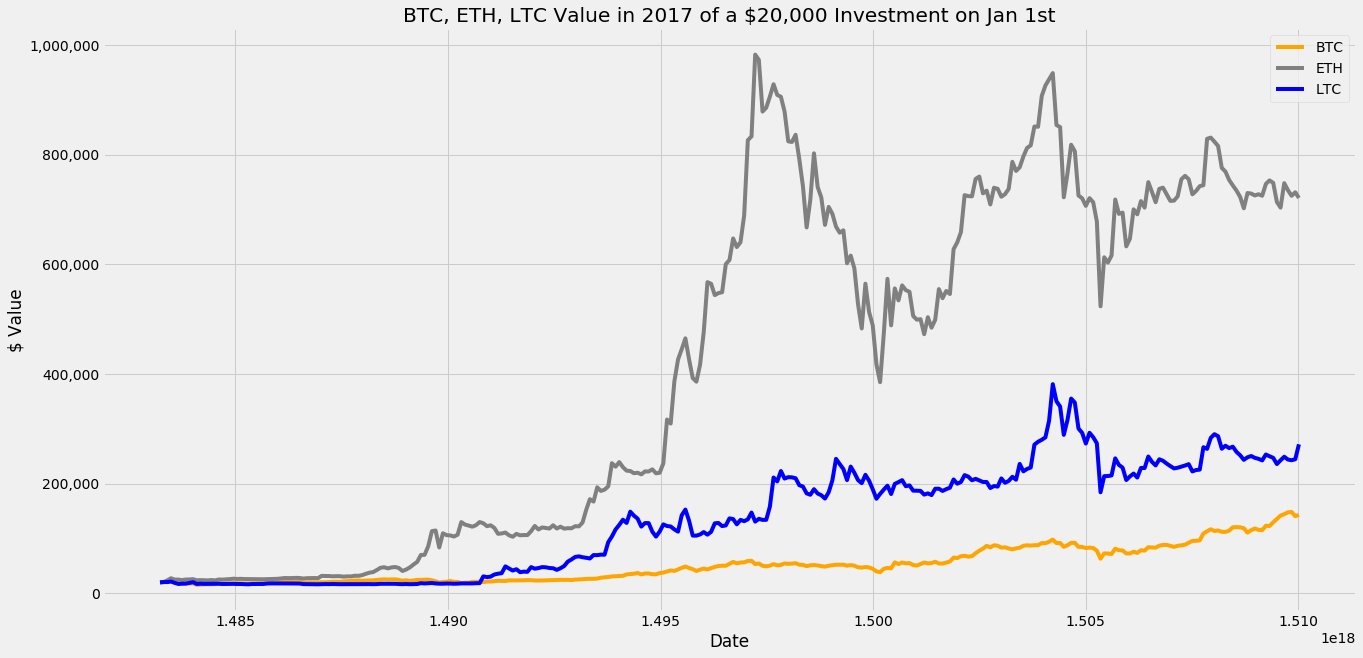

In [58]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot(df['Date'],df['BTC Close normalized 1'], color='orange', label='BTC')
plt.plot(df['Date'],df['ETH Close normalized 1'], color='grey', label='ETH')
plt.plot(df['Date'],df['LTC Close normalized 1'], color='blue', label='LTC')

plt.xlabel('Date')
plt.ylabel('$ Value')
plt.title('BTC, ETH, LTC Value in 2017 of a $20,000 Investment on Jan 1st')
plt.legend(loc='best')
#plt.xlim('2017-01-01', '2017-11-07')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.axvspan('2017-06-01', '2017-07-01', facecolor='#2ca02c', alpha=0.5)
#plt.axvspan('2017-08-15', '2017-09-15', facecolor='#2ca02c', alpha=0.5)
#plt.axvspan('2017-10-07', '2017-11-07', facecolor='#2ca02c', alpha=0.5)
plt.show()